In [139]:
import pandas as pd
import missingno as msno
import numpy as np
import re

In [140]:
df = pd.read_csv('alldata_clean.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [141]:
df.loc[(df.redcap_event_name == 'baseline_arm_1'),'redcap_event_name']='0bl'
df.loc[(df.redcap_event_name == '1_yr_follow_up_arm_1'),'redcap_event_name']='1yr'
df.loc[(df.redcap_event_name == '2_yr_follow_up_arm_1'),'redcap_event_name']='2yr'
df.loc[(df.redcap_event_name == '3_yr_follow_up_arm_1'),'redcap_event_name']='3yr'
df.loc[df['participant_id_side'].str.contains('L'), 'participant_id_side'] = 'L'
df.loc[df['participant_id_side'].str.contains('R'), 'participant_id_side'] = 'R'
df.head()
#df.describe(include = 'all')

,participant_id_side,participant_id,redcap_event_name,helper column,mri_date,dob,age,gender,height_m,weight_kg,bmi,kl_score,kl_score_contra,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,mhi5_score,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_pain_score,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_side,t1rho_mean_fem_whole_cartilage,t2_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_ace_whole_cartilage,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm,st_hip_ext_norm,st_hip_abd_norm,st_hip_add_norm,dominant_leg,ipaq_ss_vdhrs_c,ipaq_vigorous_met,ipaq_ss_mdhrs_c,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score
0,L,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.3,30.03,2.0,3.0,15.0,7.0,1.0,1.0,5.0,1.0,80.0,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,14.27,1.0,39.493545,36.250000,45.899765,31.185062,37.171642,44.196532,37.442348,40.568306,37.929268,36.808081,36.007463,40.698758,37.521459,36.840659,30.441463,37.909091,50.798319,53.857605,45.309417,41.805344,38.597826,39.825000,31.045317,29.757919,30.534884,30.734043,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,0.0,0.0,148.5,1.0
1,L,P001,1yr,1,11/6/17,NaN,66.0,1.0,1.78,93.7,29.57,NaN,NaN,11.0,3.0,1.0,1.0,5.0,1.0,76.0,70.0,82.35,81.25,68.75,92.5,15.0,20.70,10.63,NaN,1.0,40.077684,34.878938,45.215222,39.098701,42.401408,43.391304,35.740042,45.003643,35.521951,38.333333,39.850000,42.921283,33.153040,33.140000,32.275184,28.818182,49.035714,50.614035,43.564516,45.221374,29.595745,39.347826,37.831429,36.360248,44.493069,27.934066,0.26,0.41,0.24,0.51,NaN,NaN,0.0,NaN,0.0,1.0,1386.0,1.0
2,L,P001,2yr,0,12/11/18,NaN,67.0,1.0,1.78,94.9,29.95,NaN,NaN,18.0,8.0,2.0,2.0,5.0,1.0,76.0,90.0,83.82,50.00,75.00,92.5,17.0,19.10,9.80,5.00,1.0,40.776593,43.611907,42.816199,39.948726,38.971831,48.462209,42.033755,38.889091,37.704878,33.979381,42.328571,50.500000,45.236674,47.418819,33.990244,34.489796,43.089431,44.082857,41.069444,43.269517,43.797872,43.122951,41.910145,37.670000,41.169173,33.521277,0.29,0.36,NaN,0.36,NaN,1.0,480.0,1.0,480.0,2.0,2772.0,2.0
3,L,P001,3yr,0,11/6/19,NaN,68.0,NaN,1.79,97.4,30.40,NaN,NaN,16.0,7.0,1.0,2.0,5.0,1.0,56.0,75.0,64.71,56.25,75.00,77.5,16.0,20.71,10.45,11.54,1.0,38.498367,40.279898,45.451602,42.702547,40.514286,47.200000,37.768898,37.474954,33.692683,35.131313,39.727273,44.549254,36.694624,41.590994,40.213235,36.731183,40.201613,43.869707,44.276458,48.108481,48.623529,39.429752,39.794702,40.464516,46.289941,48.901235,0.27,0.60,0.16,0.47,NaN,NaN,0.0,NaN,0.0,2.0,2772.0,1.0
4,R,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.3,30.03,3.0,2.0,16.0,3.0,0.0,1.0,12.0,0.0,NaN,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,8.99,2.0,37.203218,31.179208,40.687780,35.657792,38.609929,45.260116,34.735294,35.735883,36.031707,32.101010,34.780142,38.620290,31.699580,28.598182,27.619512,26.757576,46.525000,50.877778,39.918977,35.337945,36.141304,35.741071,40.038168,33.424837,34.630832,39.919540,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#change date columns to datetime
#df.mri_date = pd.to_datetime(df.mri_date, format='%m/%d/%y')
#df.dob = pd.to_datetime(df.dob, format='%m/%d/%y')

In [112]:
#df['dob_cleaned'] = df.groupby('participant_id')['dob'].ffill().bfill() #fill in dob based by participant 
#df['dob_cleaned'] = df['dob_cleaned'] - pd.offsets.DateOffset(years=100)
#df['age_cleaned_days'] = df.mri_date - df.dob_cleaned #calculate age based on mri_date
#df['age_cleaned_years'] = df.age_cleaned_days/np.timedelta64(1,'Y')
#df['age_cleaned_days']

In [171]:
#Remove all columns that have 1yr and 3yr data 
df_BL_2Y = df[ (df['redcap_event_name']=='0bl') | (df['redcap_event_name']=='2yr')]

df_BL_2Y.head()

,participant_id_side,participant_id,redcap_event_name,helper column,mri_date,dob,age,gender,height_m,weight_kg,bmi,kl_score,kl_score_contra,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,mhi5_score,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_pain_score,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_side,t1rho_mean_fem_whole_cartilage,t2_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_ace_whole_cartilage,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm,st_hip_ext_norm,st_hip_abd_norm,st_hip_add_norm,dominant_leg,ipaq_ss_vdhrs_c,ipaq_vigorous_met,ipaq_ss_mdhrs_c,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score,idx
0,L,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.3,30.03,2.0,3.0,15.0,7.0,1.0,1.0,5.0,1.0,80.0,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,14.27,1.0,39.493545,36.250000,45.899765,31.185062,37.171642,44.196532,37.442348,40.568306,37.929268,36.808081,36.007463,40.698758,37.521459,36.840659,30.441463,37.909091,50.798319,53.857605,45.309417,41.805344,38.597826,39.825000,31.045317,29.757919,30.534884,30.734043,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,0.0,0.0,148.5,1.0,0bl_L
2,L,P001,2yr,0,12/11/18,NaN,67.0,1.0,1.78,94.9,29.95,NaN,NaN,18.0,8.0,2.0,2.0,5.0,1.0,76.0,90.0,83.82,50.00,75.00,92.5,17.0,19.10,9.80,5.00,1.0,40.776593,43.611907,42.816199,39.948726,38.971831,48.462209,42.033755,38.889091,37.704878,33.979381,42.328571,50.500000,45.236674,47.418819,33.990244,34.489796,43.089431,44.082857,41.069444,43.269517,43.797872,43.122951,41.910145,37.670000,41.169173,33.521277,0.29,0.36,NaN,0.36,NaN,1.0,480.0,1.0,480.0,2.0,2772.0,2.0,2yr_L
4,R,P001,0bl,0,10/27/16,10/15/51,65.0,1.0,1.80,97.3,30.03,3.0,2.0,16.0,3.0,0.0,1.0,12.0,0.0,NaN,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,8.99,2.0,37.203218,31.179208,40.687780,35.657792,38.609929,45.260116,34.735294,35.735883,36.031707,32.101010,34.780142,38.620290,31.699580,28.598182,27.619512,26.757576,46.525000,50.877778,39.918977,35.337945,36.141304,35.741071,40.038168,33.424837,34.630832,39.919540,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0bl_R
6,R,P001,2yr,0,12/11/18,NaN,67.0,1.0,1.78,94.9,29.95,NaN,NaN,15.0,6.0,1.0,0.0,8.0,0.0,NaN,90.0,85.29,68.75,81.25,92.5,17.0,19.10,9.80,11.00,2.0,37.646445,36.157157,40.766230,33.064145,38.609929,48.727003,39.665966,34.358182,32.009780,31.242424,30.957746,43.856707,39.186047,36.978062,29.946341,26.191919,42.386555,39.189802,38.774049,42.279923,45.521739,40.720339,35.722063,31.632054,31.017308,31.755319,0.22,0.43,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2yr_R
8,L,P002,0bl,0,11/1/16,2/15/56,60.0,2.0,1.75,62.6,20.44,1.0,1.0,10.0,2.0,0.0,0.0,8.0,0.0,92.0,100.0,100.00,100.00,100.00,100.0,19.0,14.51,9.29,72.00,1.0,36.894112,36.274728,39.063521,36.883323,34.865248,40.182081,32.983229,41.480874,34.119512,32.747475,32.845070,39.624277,36.163522,38.222222,32.787805,33.181818,39.563910,37.989247,39.185328,40.369686,34.776596,35.571429,35.745308,38.023483,36.856075,37.648352,0.00,0.00,0.00,NaN,2.0,1.0,2880.0,0.0,600.0,0.0,594.0,2.0,0bl_L


In [172]:

df_BL_2Y['hoos_symptoms_score_diffs'] = df_BL_2Y.groupby(['participant_id', 'participant_id_side'])['hoos_symptoms_score'].diff()
df_BL_2Y['hoos_symptoms_mdc'] = df_BL_2Y['hoos_symptoms_score_diffs'].apply(lambda x: 1 if x >=6.55 else (0 if (x <6.55 and x > -6.55) else (-1 if x <= -6.55 else 'NaN')))

df_BL_2Y['hoos_adl_score_diffs'] = df_BL_2Y.groupby(['participant_id', 'participant_id_side'])['hoos_adl_score'].diff()
df_BL_2Y['hoos_adl_mdc'] = df_BL_2Y['hoos_adl_score_diffs'].apply(lambda x: 1 if x >=6.55 else (0 if (x <6.55 and x > -6.55) else (-1 if x <= -6.55 else 'NaN')))

df_BL_2Y['hoos_sports_score_diffs'] = df_BL_2Y.groupby(['participant_id', 'participant_id_side'])['hoos_sports_score'].diff()
df_BL_2Y['hoos_sports_mdc'] = df_BL_2Y['hoos_sports_score_diffs'].apply(lambda x: 1 if x >=8.63 else (0 if (x <8.63 and x > -8.63) else (-1 if x <= -8.63 else 'NaN')))

df_BL_2Y['hoos_qol_score_diffs'] = df_BL_2Y.groupby(['participant_id', 'participant_id_side'])['hoos_qol_score'].diff()
df_BL_2Y['hoos_qol_mdc'] = df_BL_2Y['hoos_qol_score_diffs'].apply(lambda x: 1 if x >=8.22 else (0 if (x <8.22 and x > -8.22) else (-1 if x <= -8.22 else 'NaN')))

df_BL_2Y['hoos_pain_score_diffs'] = df_BL_2Y.groupby(['participant_id', 'participant_id_side'])['hoos_pain_score'].diff()
df_BL_2Y['hoos_pain_mdc'] = df_BL_2Y['hoos_pain_score_diffs'].apply(lambda x: 1 if x >=6.09 else (0 if (x <6.09 and x > -6.09) else (-1 if x <= -6.09 else 'NaN')))
#list(df.columns)
df_BL_2Y.head(n=15)

df_BL_2Y = df_BL_2Y.drop(['hoos_pain_score_diffs', 'hoos_symptoms_score_diffs', 'hoos_adl_score_diffs', 'hoos_sports_score_diffs', 'hoos_qol_score_diffs', 'dob'], axis=1)
df_BL_2Y.head()

/data/mqir-souza1/sam/conda/envs/sklearn_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/data/mqir-souza1/sam/conda/envs/sklearn_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/data/mqir-souza1/sam/conda/envs/sklearn_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,participant_id_side,participant_id,redcap_event_name,helper column,mri_date,age,gender,height_m,weight_kg,bmi,kl_score,kl_score_contra,shoamri_total,shoamri_car_score,shoamri_bme_score,shoamri_sc_score,shoamri_lab_score,shoamri_mis_score,mhi5_score,hoos_symptoms_score,hoos_adl_score,hoos_sports_score,hoos_qol_score,hoos_pain_score,char_rise,m_walk_test,stair_climbing,side_plank,st_hip_side,t1rho_mean_fem_whole_cartilage,t2_mean_fem_whole_cartilage,t1rho_mean_ace_whole_cartilage,t2_mean_ace_whole_cartilage,t1rho_mean_fem_2,t1rho_mean_fem_3,t1rho_mean_fem_4,t1rho_mean_fem_5,t1rho_mean_fem_6,t1rho_mean_fem_7,t2_mean_fem_2,t2_mean_fem_3,t2_mean_fem_4,t2_mean_fem_5,t2_mean_fem_6,t2_mean_fem_7,t1rho_mean_ace_2,t1rho_mean_ace_3,t1rho_mean_ace_4,t1rho_mean_ace_5,t1rho_mean_ace_6,t2_mean_ace_2,t2_mean_ace_3,t2_mean_ace_4,t2_mean_ace_5,t2_mean_ace_6,st_hip_flex_norm,st_hip_ext_norm,st_hip_abd_norm,st_hip_add_norm,dominant_leg,ipaq_ss_vdhrs_c,ipaq_vigorous_met,ipaq_ss_mdhrs_c,ipaq_moderate_met,ipaq_ss_wdhrs_c,ipaq_walking_met,ipaq_categorical_score,idx,hoos_symptoms_mdc,hoos_adl_mdc,hoos_sports_mdc,hoos_qol_mdc,hoos_pain_mdc
0,L,P001,0bl,0,10/27/16,65.0,1.0,1.80,97.3,30.03,2.0,3.0,15.0,7.0,1.0,1.0,5.0,1.0,80.0,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,14.27,1.0,39.493545,36.250000,45.899765,31.185062,37.171642,44.196532,37.442348,40.568306,37.929268,36.808081,36.007463,40.698758,37.521459,36.840659,30.441463,37.909091,50.798319,53.857605,45.309417,41.805344,38.597826,39.825000,31.045317,29.757919,30.534884,30.734043,NaN,NaN,NaN,NaN,2.0,NaN,0.0,NaN,0.0,0.0,148.5,1.0,0bl_L,NaN,NaN,NaN,NaN,NaN
2,L,P001,2yr,0,12/11/18,67.0,1.0,1.78,94.9,29.95,NaN,NaN,18.0,8.0,2.0,2.0,5.0,1.0,76.0,90.0,83.82,50.00,75.00,92.5,17.0,19.10,9.80,5.00,1.0,40.776593,43.611907,42.816199,39.948726,38.971831,48.462209,42.033755,38.889091,37.704878,33.979381,42.328571,50.500000,45.236674,47.418819,33.990244,34.489796,43.089431,44.082857,41.069444,43.269517,43.797872,43.122951,41.910145,37.670000,41.169173,33.521277,0.29,0.36,NaN,0.36,NaN,1.0,480.0,1.0,480.0,2.0,2772.0,2.0,2yr_L,-1,-1,-1,-1,-1
4,R,P001,0bl,0,10/27/16,65.0,1.0,1.80,97.3,30.03,3.0,2.0,16.0,3.0,0.0,1.0,12.0,0.0,NaN,100.0,100.00,100.00,100.00,100.0,12.0,20.89,10.77,8.99,2.0,37.203218,31.179208,40.687780,35.657792,38.609929,45.260116,34.735294,35.735883,36.031707,32.101010,34.780142,38.620290,31.699580,28.598182,27.619512,26.757576,46.525000,50.877778,39.918977,35.337945,36.141304,35.741071,40.038168,33.424837,34.630832,39.919540,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0bl_R,NaN,NaN,NaN,NaN,NaN
6,R,P001,2yr,0,12/11/18,67.0,1.0,1.78,94.9,29.95,NaN,NaN,15.0,6.0,1.0,0.0,8.0,0.0,NaN,90.0,85.29,68.75,81.25,92.5,17.0,19.10,9.80,11.00,2.0,37.646445,36.157157,40.766230,33.064145,38.609929,48.727003,39.665966,34.358182,32.009780,31.242424,30.957746,43.856707,39.186047,36.978062,29.946341,26.191919,42.386555,39.189802,38.774049,42.279923,45.521739,40.720339,35.722063,31.632054,31.017308,31.755319,0.22,0.43,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2yr_R,-1,-1,-1,-1,-1
8,L,P002,0bl,0,11/1/16,60.0,2.0,1.75,62.6,20.44,1.0,1.0,10.0,2.0,0.0,0.0,8.0,0.0,92.0,100.0,100.00,100.00,100.00,100.0,19.0,14.51,9.29,72.00,1.0,36.894112,36.274728,39.063521,36.883323,34.865248,40.182081,32.983229,41.480874,34.119512,32.747475,32.845070,39.624277,36.163522,38.222222,32.787805,33.181818,39.563910,37.989247,39.185328,40.369686,34.776596,35.571429,35.745308,38.023483,36.856075,37.648352,0.00,0.00,0.00,NaN,2.0,1.0,2880.0,0.0,600.0,0.0,594.0,2.0,0bl_L,NaN,NaN,NaN,NaN,NaN


In [173]:
df_BL_2Y['idx'] = df_BL_2Y['redcap_event_name'] + '_' + df_BL_2Y['participant_id_side'] 

In [174]:
df_wide = pd.pivot(df_BL_2Y, index='participant_id', columns = 'idx')
df_wide.head()
df_wide = df_wide.sort_index(axis=1, level=1) #sort by columns
df_wide.columns = [f'{x}_{y}' for x,y in df_wide.columns]

In [175]:
df_wide.head()
#list(df_wide.columns)
list(df_wide.columns)

['age_0bl_L',
 'bmi_0bl_L',
 'char_rise_0bl_L',
 'dominant_leg_0bl_L',
 'gender_0bl_L',
 'height_m_0bl_L',
 'helper column_0bl_L',
 'hoos_adl_mdc_0bl_L',
 'hoos_adl_score_0bl_L',
 'hoos_pain_mdc_0bl_L',
 'hoos_pain_score_0bl_L',
 'hoos_qol_mdc_0bl_L',
 'hoos_qol_score_0bl_L',
 'hoos_sports_mdc_0bl_L',
 'hoos_sports_score_0bl_L',
 'hoos_symptoms_mdc_0bl_L',
 'hoos_symptoms_score_0bl_L',
 'ipaq_categorical_score_0bl_L',
 'ipaq_moderate_met_0bl_L',
 'ipaq_ss_mdhrs_c_0bl_L',
 'ipaq_ss_vdhrs_c_0bl_L',
 'ipaq_ss_wdhrs_c_0bl_L',
 'ipaq_vigorous_met_0bl_L',
 'ipaq_walking_met_0bl_L',
 'kl_score_0bl_L',
 'kl_score_contra_0bl_L',
 'm_walk_test_0bl_L',
 'mhi5_score_0bl_L',
 'mri_date_0bl_L',
 'participant_id_side_0bl_L',
 'redcap_event_name_0bl_L',
 'shoamri_bme_score_0bl_L',
 'shoamri_car_score_0bl_L',
 'shoamri_lab_score_0bl_L',
 'shoamri_mis_score_0bl_L',
 'shoamri_sc_score_0bl_L',
 'shoamri_total_0bl_L',
 'side_plank_0bl_L',
 'st_hip_abd_norm_0bl_L',
 'st_hip_add_norm_0bl_L',
 'st_hip_ext_nor

In [176]:

#variables that only are kept for first year and left side
df_wide_2 = df_wide.drop(['height_m_0bl_R','height_m_2yr_R', 'height_m_2yr_L',
                         'gender_0bl_R', 'gender_2yr_L','gender_2yr_R',
                         'dominant_leg_0bl_R', ], axis=1)
df_wide_2.rename(columns={'height_m_0bl_L': 'height', 'gender_0bl_L': 'gender', 'dominant_leg_0bl_L': 'dominant_leg'}, inplace=True)



In [177]:
#variables that only are kept for left side
df_wide_3 = df_wide_2.drop(['age_0bl_R', 'bmi_0bl_R','weight_kg_0bl_R', 'age_2yr_R','bmi_2yr_R','weight_kg_2yr_R',
             'char_rise_0bl_R',  'char_rise_2yr_R', 
             'm_walk_test_0bl_R','m_walk_test_2yr_R',
             'stair_climbing_0bl_R','stair_climbing_2yr_R',
            'kl_score_contra_0bl_L','kl_score_contra_0bl_R',
'ipaq_categorical_score_0bl_R',
 'ipaq_moderate_met_0bl_R',
 'ipaq_ss_mdhrs_c_0bl_R',
 'ipaq_ss_vdhrs_c_0bl_R',
 'ipaq_ss_wdhrs_c_0bl_R',
 'ipaq_vigorous_met_0bl_R',
 'ipaq_walking_met_0bl_R',
'ipaq_categorical_score_2yr_R',
 'ipaq_moderate_met_2yr_R',
 'ipaq_ss_mdhrs_c_2yr_R',
 'ipaq_ss_vdhrs_c_2yr_R',
 'ipaq_ss_wdhrs_c_2yr_R',
 'ipaq_vigorous_met_2yr_R',
 'ipaq_walking_met_2yr_R'], axis =1)

#drop columns where all values are na
df_wide_3 = df_wide_3.dropna(axis='columns', how='all')

                            
df_wide_3.rename(columns={'age_0bl_L': 'age_0bl',  'age_2yr_L': 'age_2yr', 
                         'bmi_0bl_L': 'bmi_0bl',  'bmi_2yr_L': 'bmi_2yr', 
                         'weight_kg_0bl_L': 'weight_kg_0bl', 'weight_kg_2yr_L': 'weight_kg_2yr', 
                         'char_rise_0bl_L': 'char_rise_0bl', 'char_rise_2yr_L': 'char_rise_2yr', 
                         'm_walk_test_0bl_L': 'm_walk_test_0bl', 'm_walk_test_2yr_L': 'm_walk_test_2yr',
                         'stair_climbing_0bl_L': 'stair_climbing_0bl', 'stair_climbing_2yr_L': 'stair_climbing_2yr',
                         'mhi5_score_0bl_L': 'mhi5_score_0bl', 'mhi5_score_2yr_L': 'mhi5_score_2yr'}, inplace=True)
                            
#variables that are NA (mdc scores for baseline)
df_wide_3 =df_wide_3.drop(['hoos_adl_mdc_0bl_L',  'hoos_pain_mdc_0bl_L',  'hoos_symptoms_mdc_0bl_L',  'hoos_qol_mdc_0bl_L',  'hoos_sports_mdc_0bl_L','hoos_adl_mdc_0bl_R', 'hoos_symptoms_mdc_0bl_R', 'hoos_qol_mdc_0bl_R', 'hoos_pain_mdc_0bl_R', 'hoos_sports_mdc_0bl_R'], axis =1)
                            

In [ ]:
# STILL FIGURING OUT HOW TO REMOVE _L FROM IPAQ COLUMNS
#list(df_wide_3.columns.str.slice(0,-2))
#df_wide_3.columns[64:91] = (df_wide_3.columns[64:91]).str.slice(0,-2)


In [178]:
df_wide_3 = df_wide_3.sort_index(axis=1, level=1) #sort by columns

In [161]:
list(df_wide_3.columns)

['age_0bl',
 'age_2yr',
 'bmi_0bl',
 'bmi_2yr',
 'char_rise_0bl',
 'char_rise_2yr',
 'dob_0bl_L',
 'dob_0bl_R',
 'dob_2yr_L',
 'dob_2yr_R',
 'dominant_leg',
 'gender',
 'height',
 'helper column_0bl_L',
 'helper column_0bl_R',
 'helper column_2yr_L',
 'helper column_2yr_R',
 'hoos_adl_mdc_2yr_L',
 'hoos_adl_mdc_2yr_R',
 'hoos_adl_score_0bl_L',
 'hoos_adl_score_0bl_R',
 'hoos_adl_score_2yr_L',
 'hoos_adl_score_2yr_R',
 'hoos_pain_mdc_2yr_L',
 'hoos_pain_mdc_2yr_R',
 'hoos_pain_score_0bl_L',
 'hoos_pain_score_0bl_R',
 'hoos_pain_score_2yr_L',
 'hoos_pain_score_2yr_R',
 'hoos_qol_mdc_2yr_L',
 'hoos_qol_mdc_2yr_R',
 'hoos_qol_score_0bl_L',
 'hoos_qol_score_0bl_R',
 'hoos_qol_score_2yr_L',
 'hoos_qol_score_2yr_R',
 'hoos_sports_mdc_2yr_L',
 'hoos_sports_mdc_2yr_R',
 'hoos_sports_score_0bl_L',
 'hoos_sports_score_0bl_R',
 'hoos_sports_score_2yr_L',
 'hoos_sports_score_2yr_R',
 'hoos_symptoms_mdc_2yr_L',
 'hoos_symptoms_mdc_2yr_R',
 'hoos_symptoms_score_0bl_L',
 'hoos_symptoms_score_0bl_R',
 

<AxesSubplot:>

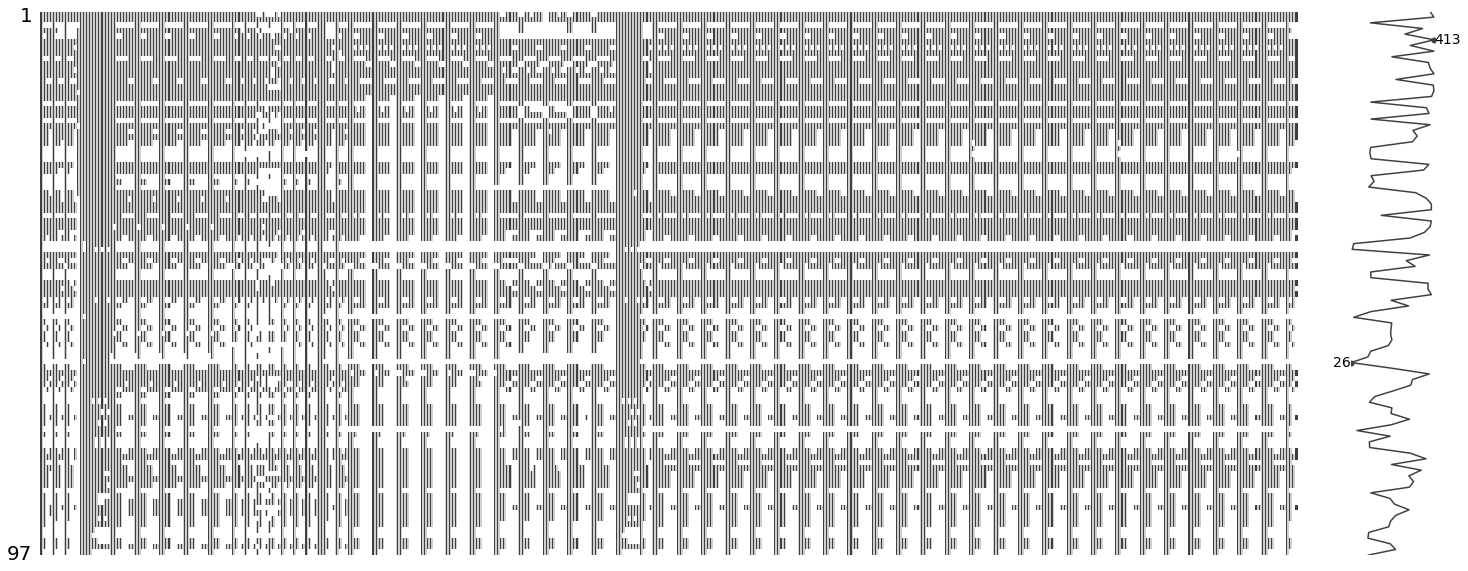

In [17]:
#methods for visualizing the data
msno.matrix(df_wide_3)
msno.heatmap(df_wide_3)
msno.dendrogram(df_wide_3)

In [179]:
df_wide_3.isna().sum()

age_0bl                                  0
age_2yr                                 52
bmi_0bl                                  4
bmi_2yr                                 52
char_rise_0bl                            5
char_rise_2yr                           58
dominant_leg                            64
gender                                   0
height                                   4
helper column_0bl_L                      0
helper column_0bl_R                      0
helper column_2yr_L                      9
helper column_2yr_R                     10
hoos_adl_mdc_2yr_L                       9
hoos_adl_mdc_2yr_R                      10
hoos_adl_score_0bl_L                     2
hoos_adl_score_0bl_R                     3
hoos_adl_score_2yr_L                    51
hoos_adl_score_2yr_R                    52
hoos_pain_mdc_2yr_L                      9
hoos_pain_mdc_2yr_R                     10
hoos_pain_score_0bl_L                    2
hoos_pain_score_0bl_R                    3
hoos_pain_s

In [180]:
#Remove all rows where there are NA values for age @ 2yr followup
df_wide_bl_2yr = df_wide_3.dropna(subset=['age_2yr']) 
df_wide_bl_2yr = df_wide_bl_2yr.sort_index(axis=1, level=1) #sort by columns

In [164]:
list(df_wide_bl_2yr.columns)

['age_0bl',
 'age_2yr',
 'bmi_0bl',
 'bmi_2yr',
 'char_rise_0bl',
 'char_rise_2yr',
 'dob_0bl_L',
 'dob_0bl_R',
 'dob_2yr_L',
 'dob_2yr_R',
 'dominant_leg',
 'gender',
 'height',
 'helper column_0bl_L',
 'helper column_0bl_R',
 'helper column_2yr_L',
 'helper column_2yr_R',
 'hoos_adl_mdc_2yr_L',
 'hoos_adl_mdc_2yr_R',
 'hoos_adl_score_0bl_L',
 'hoos_adl_score_0bl_R',
 'hoos_adl_score_2yr_L',
 'hoos_adl_score_2yr_R',
 'hoos_pain_mdc_2yr_L',
 'hoos_pain_mdc_2yr_R',
 'hoos_pain_score_0bl_L',
 'hoos_pain_score_0bl_R',
 'hoos_pain_score_2yr_L',
 'hoos_pain_score_2yr_R',
 'hoos_qol_mdc_2yr_L',
 'hoos_qol_mdc_2yr_R',
 'hoos_qol_score_0bl_L',
 'hoos_qol_score_0bl_R',
 'hoos_qol_score_2yr_L',
 'hoos_qol_score_2yr_R',
 'hoos_sports_mdc_2yr_L',
 'hoos_sports_mdc_2yr_R',
 'hoos_sports_score_0bl_L',
 'hoos_sports_score_0bl_R',
 'hoos_sports_score_2yr_L',
 'hoos_sports_score_2yr_R',
 'hoos_symptoms_mdc_2yr_L',
 'hoos_symptoms_mdc_2yr_R',
 'hoos_symptoms_score_0bl_L',
 'hoos_symptoms_score_0bl_R',
 

In [181]:
#drop rows that have NAs to exclude patients with incomplete data for variables that should be included 

#drop rows for missing baseline data
df_wide_bl_2yr = df_wide_bl_2yr.dropna(subset=['hoos_adl_score_0bl_R',
                             'shoamri_bme_score_0bl_L','shoamri_sc_score_0bl_R', 'st_hip_abd_norm_0bl_L']) 

#drop rows for missing 2yr data
df_wide_bl_2yr = df_wide_bl_2yr.dropna(subset=['hoos_adl_score_2yr_L']) 

df_wide_bl_2yr = df_wide_bl_2yr.sort_index(axis=1, level=1) #sort by columns

#drop columns where all values are na
df_wide_bl_2yr = df_wide_bl_2yr.dropna(axis='columns', how='all')

In [182]:
df_wide_bl_2yr.isna().sum()

#df_wide_bl_2yr.describe()

age_0bl                                  0
age_2yr                                  0
bmi_0bl                                  0
bmi_2yr                                  0
char_rise_0bl                            0
char_rise_2yr                            5
dominant_leg                            19
gender                                   0
height                                   0
helper column_0bl_L                      0
helper column_0bl_R                      0
helper column_2yr_L                      0
helper column_2yr_R                      0
hoos_adl_mdc_2yr_L                       0
hoos_adl_mdc_2yr_R                       0
hoos_adl_score_0bl_L                     0
hoos_adl_score_0bl_R                     0
hoos_adl_score_2yr_L                     0
hoos_adl_score_2yr_R                     0
hoos_pain_mdc_2yr_L                      0
hoos_pain_mdc_2yr_R                      0
hoos_pain_score_0bl_L                    0
hoos_pain_score_0bl_R                    0
hoos_pain_s

In [183]:
#drop columns that will not be used in analysis 
df_final = df_wide_bl_2yr.drop(['dominant_leg','t2_mean_fem_2_0bl_R', 't2_mean_ace_2_0bl_R', 'st_hip_abd_norm_0bl_L',
 'st_hip_abd_norm_0bl_R',
 'st_hip_add_norm_0bl_L',
 'st_hip_add_norm_0bl_R',
'st_hip_side_0bl_L',
 'st_hip_side_0bl_R', 
'ipaq_ss_mdhrs_c_0bl_L',
 'ipaq_ss_vdhrs_c_0bl_L',
 'ipaq_ss_wdhrs_c_0bl_L',
'ipaq_categorical_score_0bl_L', 
                                'helper column_0bl_L',
 'helper column_0bl_R'], axis=1)



In [184]:
#now that all the patients are included/excluded that will be used in analysis, create outcome dataframe
df_wide_bl_2yr_outcomes = df_final.filter(regex='2yr')
df_final = df_final.drop(df_final.filter(regex='2yr').columns, axis=1)

In [185]:
list(df_wide_bl_2yr_outcomes.columns)
df_wide_bl_2yr_outcomes.isna().sum()

age_2yr                                  0
bmi_2yr                                  0
char_rise_2yr                            5
helper column_2yr_L                      0
helper column_2yr_R                      0
hoos_adl_mdc_2yr_L                       0
hoos_adl_mdc_2yr_R                       0
hoos_adl_score_2yr_L                     0
hoos_adl_score_2yr_R                     0
hoos_pain_mdc_2yr_L                      0
hoos_pain_mdc_2yr_R                      0
hoos_pain_score_2yr_L                    0
hoos_pain_score_2yr_R                    0
hoos_qol_mdc_2yr_L                       0
hoos_qol_mdc_2yr_R                       0
hoos_qol_score_2yr_L                     0
hoos_qol_score_2yr_R                     0
hoos_sports_mdc_2yr_L                    0
hoos_sports_mdc_2yr_R                    0
hoos_sports_score_2yr_L                  0
hoos_sports_score_2yr_R                  0
hoos_symptoms_mdc_2yr_L                  0
hoos_symptoms_mdc_2yr_R                  0
hoos_sympto

In [186]:
df_final.isna().sum()
#df_final.describe()
#list(df_wide_bl_2yr.columns)

age_0bl                                 0
bmi_0bl                                 0
char_rise_0bl                           0
gender                                  0
height                                  0
hoos_adl_score_0bl_L                    0
hoos_adl_score_0bl_R                    0
hoos_pain_score_0bl_L                   0
hoos_pain_score_0bl_R                   0
hoos_qol_score_0bl_L                    0
hoos_qol_score_0bl_R                    0
hoos_sports_score_0bl_L                 0
hoos_sports_score_0bl_R                 0
hoos_symptoms_score_0bl_L               0
hoos_symptoms_score_0bl_R               0
ipaq_moderate_met_0bl_L                 0
ipaq_vigorous_met_0bl_L                 0
ipaq_walking_met_0bl_L                  0
kl_score_0bl_L                          0
kl_score_0bl_R                          0
m_walk_test_0bl                         0
mhi5_score_0bl                          0
mri_date_0bl_L                          0
mri_date_0bl_R                    

In [63]:
#used to explore missing data
testdf = df_final[df_final['t2_mean_ace_2_0bl_R'].isna()]
testdf

,age_0bl,age_2yr,bmi_0bl,bmi_2yr,gender,height,hoos_adl_score_0bl_L,hoos_adl_score_0bl_R,hoos_adl_score_2yr_L,hoos_adl_score_2yr_R,hoos_pain_score_0bl_L,hoos_pain_score_0bl_R,hoos_pain_score_2yr_L,hoos_pain_score_2yr_R,hoos_qol_score_0bl_L,hoos_qol_score_0bl_R,hoos_qol_score_2yr_L,hoos_qol_score_2yr_R,hoos_sports_score_0bl_L,hoos_sports_score_0bl_R,hoos_sports_score_2yr_L,hoos_sports_score_2yr_R,hoos_symptoms_score_0bl_L,hoos_symptoms_score_0bl_R,hoos_symptoms_score_2yr_L,hoos_symptoms_score_2yr_R,ipaq_moderate_met_0bl_L,ipaq_moderate_met_2yr_L,ipaq_vigorous_met_0bl_L,ipaq_vigorous_met_2yr_L,ipaq_walking_met_0bl_L,ipaq_walking_met_2yr_L,kl_score_0bl_L,kl_score_0bl_R,m_walk_test_0bl,m_walk_test_2yr,mhi5_score_0bl,mhi5_score_2yr,t1rho_mean_ace_2_0bl_L,t1rho_mean_ace_2_0bl_R,t1rho_mean_ace_2_2yr_L,t1rho_mean_ace_2_2yr_R,t1rho_mean_ace_3_0bl_L,t1rho_mean_ace_3_0bl_R,t1rho_mean_ace_3_2yr_L,t1rho_mean_ace_3_2yr_R,t1rho_mean_ace_4_0bl_L,t1rho_mean_ace_4_0bl_R,t1rho_mean_ace_4_2yr_L,t1rho_mean_ace_4_2yr_R,t1rho_mean_ace_5_0bl_L,t1rho_mean_ace_5_0bl_R,t1rho_mean_ace_5_2yr_L,t1rho_mean_ace_5_2yr_R,t1rho_mean_ace_6_0bl_L,t1rho_mean_ace_6_0bl_R,t1rho_mean_ace_6_2yr_L,t1rho_mean_ace_6_2yr_R,t1rho_mean_ace_whole_cartilage_0bl_L,t1rho_mean_ace_whole_cartilage_0bl_R,t1rho_mean_ace_whole_cartilage_2yr_L,t1rho_mean_ace_whole_cartilage_2yr_R,t1rho_mean_fem_2_0bl_L,t1rho_mean_fem_2_0bl_R,t1rho_mean_fem_2_2yr_L,t1rho_mean_fem_2_2yr_R,t1rho_mean_fem_3_0bl_L,t1rho_mean_fem_3_0bl_R,t1rho_mean_fem_3_2yr_L,t1rho_mean_fem_3_2yr_R,t1rho_mean_fem_4_0bl_L,t1rho_mean_fem_4_0bl_R,t1rho_mean_fem_4_2yr_L,t1rho_mean_fem_4_2yr_R,t1rho_mean_fem_5_0bl_L,t1rho_mean_fem_5_0bl_R,t1rho_mean_fem_5_2yr_L,t1rho_mean_fem_5_2yr_R,t1rho_mean_fem_6_0bl_L,t1rho_mean_fem_6_0bl_R,t1rho_mean_fem_6_2yr_L,t1rho_mean_fem_6_2yr_R,t1rho_mean_fem_7_0bl_L,t1rho_mean_fem_7_0bl_R,t1rho_mean_fem_7_2yr_L,t1rho_mean_fem_7_2yr_R,t1rho_mean_fem_whole_cartilage_0bl_L,t1rho_mean_fem_whole_cartilage_0bl_R,t1rho_mean_fem_whole_cartilage_2yr_L,t1rho_mean_fem_whole_cartilage_2yr_R,t2_mean_ace_2_0bl_L,t2_mean_ace_2_0bl_R,t2_mean_ace_2_2yr_L,t2_mean_ace_2_2yr_R,t2_mean_ace_3_0bl_L,t2_mean_ace_3_0bl_R,t2_mean_ace_3_2yr_L,t2_mean_ace_3_2yr_R,t2_mean_ace_4_0bl_L,t2_mean_ace_4_0bl_R,t2_mean_ace_4_2yr_L,t2_mean_ace_4_2yr_R,t2_mean_ace_5_0bl_L,t2_mean_ace_5_0bl_R,t2_mean_ace_5_2yr_L,t2_mean_ace_5_2yr_R,t2_mean_ace_6_0bl_L,t2_mean_ace_6_0bl_R,t2_mean_ace_6_2yr_L,t2_mean_ace_6_2yr_R,t2_mean_ace_whole_cartilage_0bl_L,t2_mean_ace_whole_cartilage_0bl_R,t2_mean_ace_whole_cartilage_2yr_L,t2_mean_ace_whole_cartilage_2yr_R,t2_mean_fem_2_0bl_L,t2_mean_fem_2_0bl_R,t2_mean_fem_2_2yr_L,t2_mean_fem_2_2yr_R,t2_mean_fem_3_0bl_L,t2_mean_fem_3_0bl_R,t2_mean_fem_3_2yr_L,t2_mean_fem_3_2yr_R,t2_mean_fem_4_0bl_L,t2_mean_fem_4_0bl_R,t2_mean_fem_4_2yr_L,t2_mean_fem_4_2yr_R,t2_mean_fem_5_0bl_L,t2_mean_fem_5_0bl_R,t2_mean_fem_5_2yr_L,t2_mean_fem_5_2yr_R,t2_mean_fem_6_0bl_L,t2_mean_fem_6_0bl_R,t2_mean_fem_6_2yr_L,t2_mean_fem_6_2yr_R,t2_mean_fem_7_0bl_L,t2_mean_fem_7_0bl_R,t2_mean_fem_7_2yr_L,t2_mean_fem_7_2yr_R,t2_mean_fem_whole_cartilage_0bl_L,t2_mean_fem_whole_cartilage_0bl_R,t2_mean_fem_whole_cartilage_2yr_L,t2_mean_fem_whole_cartilage_2yr_R,weight_kg_0bl,weight_kg_2yr
participant_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P024,34.0,36.0,24.02,24.47,2.0,1.47,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,160.0,180.0,800.0,0.0,462.0,1386.0,0.0,0.0,16.0,17.48,68.0,76.0,28.496296,25.081481,31.318519,30.57037,35.141361,27.934555,40.195251,35.28534,37.104167,29.929924,44.802682,37.215909,36.976103,35.862385,49.265107,37.873395,22.095745,32.393617,27.095745,25.808511,35.085544,31.120643,43.004275,35.818886,38.485915,34.241135,34.140845,34.126761,38.601156,40.086705,36.182081,33.886628,37.549266,40.389937,34.135593,35.353684,37.803636,39.863636,33.896104,36.77090

In [187]:
df_final.to_csv('alldata_clean_final.csv')
df_wide_bl_2yr_outcomes.to_csv('alldata_clean_final_outcomes.csv')